In [43]:
import pandas as pd

df = pd.read_excel('data/Microsoft_LinkedIn_Processed.xlsx')
df

,Date,Open,High,Low,Close,Adj Close,Volume,change_tomorrow,change_tomorrow_direction
0,2016-12-08,61.299999,61.580002,60.840000,61.009998,55.402447,21220800,1.549141,UP
1,2016-12-09,61.180000,61.990002,61.130001,61.970001,56.274204,27349400,0.321694,UP
2,2016-12-12,61.820000,62.299999,61.720001,62.169998,56.455830,20198100,1.286125,UP
3,2016-12-13,62.500000,63.419998,62.240002,62.980000,57.191383,35718900,-0.478620,DOWN
4,2016-12-14,63.000000,63.450001,62.529999,62.680000,56.918945,30352700,-0.159793,DOWN
...,...,...,...,...,...,...,...,...,...
1942,2024-08-29,414.940002,422.049988,410.600006,413.119995,413.119995,17045200,0.963710,UP
1943,2024-08-30,415.600006,417.489990,412.130005,417.140015,417.140015,24308300,-1.880620,DOWN
1944,2024-09-03,417.910004,419.880005,407.029999,409.440002,409.440002,20285900,-0.132064,DOWN
1945,2024-09-04,405.910004,411.239990,404.369995,408.899994,408.899994,15135800,-0.124876,DOWN


In [44]:
target = df.change_tomorrow_direction

# Only keep the columns we need for the model
explanatory = df[['Open','High','Low','Close','Volume']]
explanatory

,Open,High,Low,Close,Volume
0,61.299999,61.580002,60.840000,61.009998,21220800
1,61.180000,61.990002,61.130001,61.970001,27349400
2,61.820000,62.299999,61.720001,62.169998,20198100
3,62.500000,63.419998,62.240002,62.980000,35718900
4,63.000000,63.450001,62.529999,62.680000,30352700
...,...,...,...,...,...
1942,414.940002,422.049988,410.600006,413.119995,17045200
1943,415.600006,417.489990,412.130005,417.140015,24308300
1944,417.910004,419.880005,407.029999,409.440002,20285900
1945,405.910004,411.239990,404.369995,408.899994,15135800


In [45]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(max_depth=15)
model_dt.fit(explanatory, target)

DecisionTreeClassifier(max_depth=15)

<function sklearn.tree._export.plot_tree(decision_tree, *, max_depth=None, feature_names=None, class_names=None, label='all', filled=False, impurity=True, node_ids=False, proportion=False, rounded=False, precision=3, ax=None, fontsize=None)>

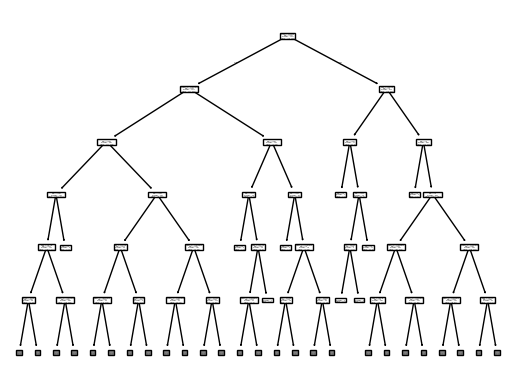

In [46]:
# Visualize the decision tree
from sklearn.tree import plot_tree

# plot_tree(decision_tree=model_dt, feature_names=model_dt.feature_names_in_)
plot_tree(decision_tree=model_dt, feature_names=model_dt.feature_names_in_, max_depth=5)
plot_tree

In [47]:
y_pred = model_dt.predict(explanatory)

In [48]:
df_prediction = df[['change_tomorrow_direction']].copy()
df_prediction['prediction'] = y_pred
df_prediction

,change_tomorrow_direction,prediction
0,UP,UP
1,UP,UP
2,UP,UP
3,DOWN,DOWN
4,DOWN,DOWN
...,...,...
1942,UP,DOWN
1943,DOWN,DOWN
1944,DOWN,DOWN
1945,DOWN,DOWN


Evaluate the model

In [49]:
compare = df_prediction['change_tomorrow_direction'] == df_prediction['prediction']

compare.sum()

1617

In [50]:
compare.sum() / len(compare)

0.8305084745762712

Save the model

In [53]:
import pickle
with open('models/model_dt_classification.pkl', 'wb') as f:
  pickle.dump(model_dt, f)